## 1.Importing Data and Understanding it.

The datset can be found here.
<nav>
<a href="https://www.kaggle.com/datasets/spideysloth/pakwheels-cars-dataset?resource=download&select=pakwheels-11Jul2020.csv"> PakWheels Used Cars for sale </a>

In [1]:
# Let's import all the important libraries. 
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [2]:
file= 'pakwheels_used_cars.csv'
df=pd.read_csv(file)
df.head()

,Ad No,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,Last Updated,URL
0,4096758,Toyota Vitz F 1.0 2017,2385000.0,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,Petrol,1000 cc,Automatic,Silver,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 11, 2020",https://www.pakwheels.com/used-cars/toyota-vit...
1,4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000.00000000001,2019,Peshawar KPK,11111,Islamabad,Petrol,1300 cc,Automatic,White,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 12, 2020",https://www.pakwheels.com/used-cars/toyota-cor...
2,4168298,Suzuki Alto VXL 2019,1530000.0,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,Petrol,660 cc,Automatic,White,Local,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...","Jul 12, 2020",https://www.pakwheels.com/used-cars/suzuki-alt...
3,4168307,Suzuki Alto VXR 2019,1650000.0,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,Petrol,660 cc,Manual,White,Local,Hatchback,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...","Jul 12, 2020",https://www.pakwheels.com/used-cars/suzuki-alt...
4,4168306,Toyota Corolla XLi VVTi 2010,1435000.0,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,Petrol,1300 cc,Manual,Black,Local,Sedan,"AM/FM Radio, Air Conditioning, CD Player, Key...","Jul 12, 2020",https://www.pakwheels.com/used-cars/toyota-cor...


In [3]:
# To get the number of rows and columns.
df.shape

(56186, 16)

In [4]:
# To get important information.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56186 entries, 0 to 56185
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ad No            56186 non-null  int64 
 1   Name             56186 non-null  object
 2   Price            56186 non-null  object
 3   Model Year       56186 non-null  int64 
 4   Location         56186 non-null  object
 5   Mileage          56186 non-null  int64 
 6   Registered City  56186 non-null  object
 7   Engine Type      54904 non-null  object
 8   Engine Capacity  56186 non-null  object
 9   Transmission     56186 non-null  object
 10  Color            56186 non-null  object
 11  Assembly         56186 non-null  object
 12  Body Type        49717 non-null  object
 13  Features         50765 non-null  object
 14  Last Updated     56186 non-null  object
 15  URL              56186 non-null  object
dtypes: int64(3), object(13)
memory usage: 6.9+ MB


<div class="alert alert-block alert-info">
<b> From above, it can be seen that "Engine Type", "Body Type" and "Features" have some missing rows.         
    We shall tackle them in Data Wrangling or cleaning part.</div>

---
---

## 2.Data Wrangling. 


1. "Ad No" is always unique, therefore it will be **set as index**. 
2. We shall **drop the columns** named "Last Updated" and "URL", because of their insignificance for our analysis. 
3. "Call for price" in "Price" column will be droped because we want to predict the car prices. 
4. **Data formatting**: We shall be changind data types if deemed necessary. 
5. Finally, we shall see if there are **missing values** or anything odd about our data, and wether it is good to drop them or **replace them** with mean or some other method.

In [5]:
df['Ad No'].nunique()

56186

In [6]:
#Setting 'Ad No' as the index. 
df.set_index('Ad No', inplace=True) 
df.drop(['Last Updated', 'URL'], axis = 1, inplace=True) # Dropping the columns. 
df.head()

,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features
Ad No,,,,,,,,,,,,,
4096758,Toyota Vitz F 1.0 2017,2385000.0,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,Petrol,1000 cc,Automatic,Silver,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."
4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000.00000000001,2019,Peshawar KPK,11111,Islamabad,Petrol,1300 cc,Automatic,White,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."
4168298,Suzuki Alto VXL 2019,1530000.0,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,Petrol,660 cc,Automatic,White,Local,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."
4168307,Suzuki Alto VXR 2019,1650000.0,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,Petrol,660 cc,Manual,White,Local,Hatchback,"AM/FM Radio, Air Bags, Air Conditioning, DVD ..."
4168306,Toyota Corolla XLi VVTi 2010,1435000.0,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,Petrol,1300 cc,Manual,Black,Local,Sedan,"AM/FM Radio, Air Conditioning, CD Player, Key..."


In [7]:
# here, we are creating a filter which we will apply to drop method. 
filt= (df['Price']=='Call for price')
df.drop(index=df[filt].index, inplace=True)
df.shape

(54914, 13)

In [8]:
# To get missing values.
df.isnull().sum()

Name                  0
Price                 0
Model Year            0
Location              0
Mileage               0
Registered City       0
Engine Type        1281
Engine Capacity       0
Transmission          0
Color                 0
Assembly              0
Body Type          6386
Features           5361
dtype: int64

In [9]:
# Replacing unknown features with 'Unknown'. 
df['Features'].replace(np.nan, 'Unknown', inplace=True)

In [10]:
df['Engine Type'].value_counts()

Petrol    49736
Hybrid     2001
Diesel     1896
Name: Engine Type, dtype: int64

In [11]:
# Replacing missing values with the most occured value of 'Petrol'.
df['Engine Type'].replace(np.nan, 'Petrol', inplace=True)

In [12]:
# To check what are the most common body types. 
df['Body Type'].value_counts().idxmax()

'Hatchback'

In [13]:
# Replacing missing values with 'Hatchback'. 
df['Body Type'].replace(np.nan, 'Hatchback', inplace=True)

In [14]:
df.isnull().sum()

Name               0
Price              0
Model Year         0
Location           0
Mileage            0
Registered City    0
Engine Type        0
Engine Capacity    0
Transmission       0
Color              0
Assembly           0
Body Type          0
Features           0
dtype: int64

In [15]:
# Replacing and changing 'Price' and 'Engine Capacity' into float. 
df['Price']=df['Price'].apply(lambda x: x.replace('PKR', '').replace(',', '')).astype('float')
df['Engine Capacity']=df['Engine Capacity'].apply(lambda x: x.replace('cc', '')).astype('float')

In [16]:
# Prices above 7 Million PKR. 
imported_cars=df[df.Price>7000000]
imported_cars

,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features
Ad No,,,,,,,,,,,,,
4168321,Toyota Fortuner 2.8 Sigma 4 2018,8650000.0,2018,Lahore Punjab,35000,Islamabad,Diesel,2800.0,Automatic,White,Local,SUV,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."
4135460,Audi A4 1.4 TFSI 2017,8700000.0,2017,"Khalid Bin Walid Road, Karachi Sindh",5900,Karachi,Petrol,1400.0,Automatic,Grey,Imported,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."
4138479,Toyota Prado TZ G 4.0 2012,13900000.0,2012,"Khalid Bin Walid Road, Karachi Sindh",75000,Karachi,Petrol,4000.0,Automatic,Black,Imported,SUV,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."
4090228,Toyota Harrier 2014,9175000.0,2014,"Blue Area, Islamabad Islamabad",61118,Un-Registered,Petrol,2500.0,Automatic,Black,Imported,Hatchback,Unknown
4167807,Toyota Land Cruiser ZX 2016,34300000.0,2016,"Cantt, Lahore Punjab",43200,Islamabad,Petrol,4608.0,Automatic,Black,Imported,SUV,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4116961,Toyota Land Cruiser AX G Selection 2007,13000000.0,2007,Multan Punjab,78000,Islamabad,Petrol,4600.0,Automatic,White,Imported,SUV,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."
4117514,Toyota Prado TX L Package 2.7 2012,12700000.0,2012,Lahore Punjab,80000,Islamabad,Petrol,2700.0,Automatic,Black,Imported,SUV,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."
4108573,Range Rover Vogue 5.0 V8 2009,17500000.0,2009,Lahore Punjab,110000,Lahore,Petrol,5000.0,Automatic,Black,Imported,SUV,"ABS, AM/FM Radio, Air Bags, Air Conditioning,..."


<div class="alert alert-block alert-info">
<b>Info:</b> These are imported cars such as Lexus, Range Rover, Prado, and Audi etc. These are actually expensive cars and are also very few in Pakistan.</div>

In [17]:
df.drop(df[df['Price'] > 7000000].index, inplace = True)

**Let's check any outliers.**

In [18]:
df['z_score'] = (df['Price'] - df['Price'].mean()) / df['Price'].std()

In [19]:
df.sort_values(by=['z_score'])

,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,z_score
Ad No,,,,,,,,,,,,,,
4161139,Suzuki Alto ECO-S 2014,1260.0,2014,"Buffer Zone, Karachi Sindh",65000,Karachi,Petrol,660.0,Automatic,White,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",-1.506311
4167300,Honda Other 2019,104000.0,2019,Sangla Hills Punjab,11144,Lahore,Petrol,125.0,Manual,Red,Imported,Hatchback,Unknown,-1.412979
4101419,Suzuki FX 1998,110000.0,1998,"Nazimabad, Karachi Sindh",70000,Karachi,Petrol,800.0,Manual,Green,Local,Hatchback,Unknown,-1.407528
4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000.0,2019,Peshawar KPK,11111,Islamabad,Petrol,1300.0,Automatic,White,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",-1.406620
4136566,Suzuki Khyber 1992,120000.0,1992,"Nazimabad, Karachi Sindh",190000,Karachi,Petrol,1000.0,Manual,White,Local,Hatchback,AM/FM Radio,-1.398444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4158559,Toyota Hilux Revo V Automatic 2.8 2019,7000000.0,2019,"D.H.A, Karachi Sindh",9600,Karachi,Diesel,2800.0,Automatic,Black,Local,Double Cabin,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",4.851558
4164402,Toyota Prius PHV (Plug In Hybrid) 2017,7000000.0,2017,Karachi Sindh,35947,Un-Registered,Hybrid,1800.0,Automatic,Assembly,Imported,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",4.851558
4064693,Volkswagen Touareg 2005,7000000.0,2005,"Chaklala Scheme, Rawalpindi Punjab",250000,Un-Registered,Diesel,3600.0,Automatic,Black,Imported,Hatchback,Unknown,4.851558


In [20]:
# Removing the outliers
df.drop(df[df['z_score'] > 3.0].index, inplace = True)
df.drop(df[df['Price'] < 100000.0].index, inplace = True)

In [21]:
df.sort_values(by=['z_score'])

,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,z_score
Ad No,,,,,,,,,,,,,,
4167300,Honda Other 2019,104000.0,2019,Sangla Hills Punjab,11144,Lahore,Petrol,125.0,Manual,Red,Imported,Hatchback,Unknown,-1.412979
4101419,Suzuki FX 1998,110000.0,1998,"Nazimabad, Karachi Sindh",70000,Karachi,Petrol,800.0,Manual,Green,Local,Hatchback,Unknown,-1.407528
4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000.0,2019,Peshawar KPK,11111,Islamabad,Petrol,1300.0,Automatic,White,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",-1.406620
4164126,Suzuki FX GA 1990,120000.0,1990,"Walton Road, Lahore Punjab",150000,Lahore,Petrol,800.0,Automatic,Grey,Imported,Hatchback,Unknown,-1.398444
4136566,Suzuki Khyber 1992,120000.0,1992,"Nazimabad, Karachi Sindh",190000,Karachi,Petrol,1000.0,Manual,White,Local,Hatchback,AM/FM Radio,-1.398444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3951574,Toyota Prius S 2017,4950000.0,2017,"Faisal Town, Lahore Punjab",40000,Un-Registered,Hybrid,1800.0,Automatic,White,Imported,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2.989276
3961308,Toyota Prius A Touring Selection 2016,4950000.0,2016,"Kashmir Road, Sialkot Punjab",22500,Un-Registered,Petrol,1800.0,Automatic,White,Imported,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2.989276
4126104,Toyota Prius S 2017,4950000.0,2017,"University Road, Peshawar KPK",44000,Un-Registered,Hybrid,1800.0,Automatic,Silver,Imported,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",2.989276


In [22]:
# A statistical summary. 
df['Price'].describe()

count    5.255500e+04
mean     1.583271e+06
std      9.515335e+05
min      1.040000e+05
25%      8.250000e+05
50%      1.390000e+06
75%      2.175000e+06
max      4.950000e+06
Name: Price, dtype: float64

---
---

## 3.Exploratory Analysis.

### **Q1. What is the most popular engine type?**

Text(0.5, 1.0, 'The most popular engine type')

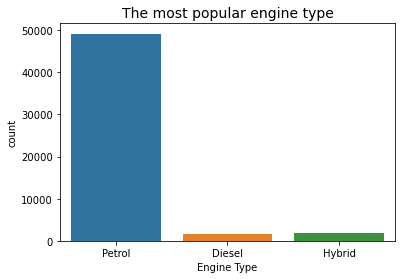

In [23]:
sns.countplot(data=df, x='Engine Type')
plt.title('The most popular engine type',size=14)

### **Q2. What are the top fifteen used cars listed?**

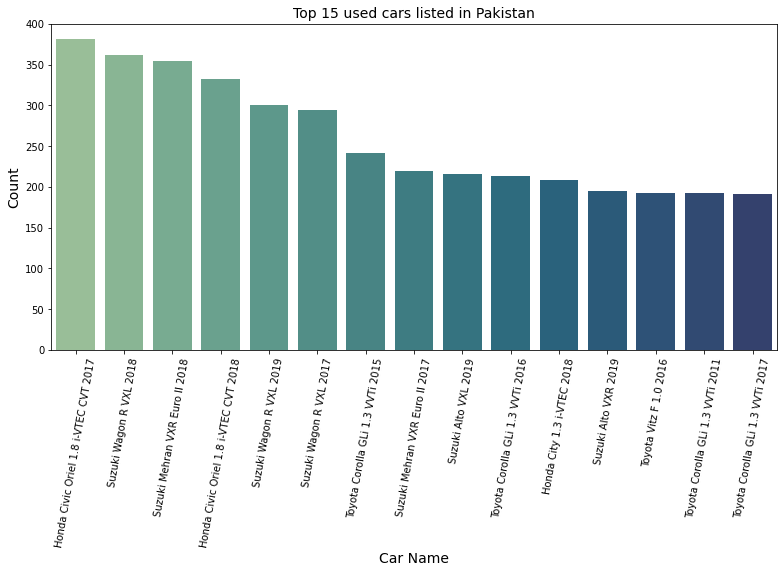

In [24]:
Pop_cars=df["Name"].value_counts()
plt.figure(figsize=(13,6))
count_of_Pop_cars = df['Name'].value_counts()[0:15].sort_values(ascending=False)
sns.countplot(data=df, x='Name',order=count_of_Pop_cars.index,palette="crest")
plt.title('Top 15 used cars listed in Pakistan',size=14)
plt.xlabel('Car Name', size=14)
plt.xticks(rotation=80)
plt.ylabel('Count', size=14)
plt.show()

### **Q3. What transmission type occurs more in used cars listed?**

In [25]:
df['Transmission'].value_counts()

Manual       27891
Automatic    24664
Name: Transmission, dtype: int64

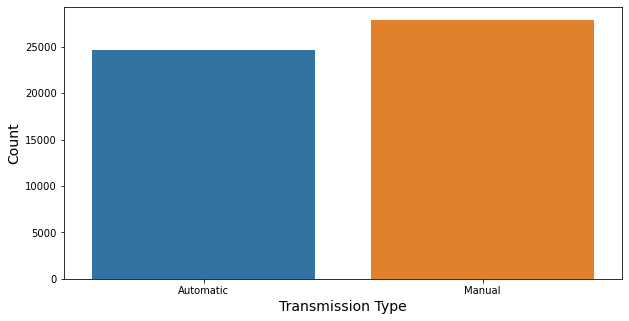

In [27]:
plt.figure(figsize=(10,5))
sns.countplot(data=df ,x="Transmission" ) 
plt.xlabel('Transmission Type',size=14)
plt.ylabel('Count',size=14)
plt.show()

### **Q4. What effect engine size has on the price of used cars listed?**

In [28]:
# Here we are binning the engine capacity into different bins.
group_names=['660','1000', '1300', '1500', '1800', '2400','3000', '5000', '6000']
cut_bins = [0, 660, 1000, 1300, 1500, 1800, 2400, 3000,5000, 6000]
df['Engine Size'] = pd.cut(df['Engine Capacity'], bins=cut_bins, labels=group_names)

In [29]:
df.head()

,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,z_score,Engine Size
Ad No,,,,,,,,,,,,,,,
4096758,Toyota Vitz F 1.0 2017,2385000.0,2017,"G- 8, Islamabad Islamabad",9869,Un-Registered,Petrol,1000.0,Automatic,Silver,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",0.659151,1000
4168305,Toyota Corolla GLi Automatic 1.3 VVTi 2019,111000.0,2019,Peshawar KPK,11111,Islamabad,Petrol,1300.0,Automatic,White,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",-1.406620,1300
4168298,Suzuki Alto VXL 2019,1530000.0,2019,"Akora Khattak, Nowshera KPK",17500,Un-Registered,Petrol,660.0,Automatic,White,Local,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",-0.117557,660
4168307,Suzuki Alto VXR 2019,1650000.0,2019,"Abdullahpur, Faisalabad Punjab",9600,Lahore,Petrol,660.0,Manual,White,Local,Hatchback,"AM/FM Radio, Air Bags, Air Conditioning, DVD ...",-0.008545,660
4168306,Toyota Corolla XLi VVTi 2010,1435000.0,2010,"9th Avenue, Islamabad Islamabad",120000,Islamabad,Petrol,1300.0,Manual,Black,Local,Sedan,"AM/FM Radio, Air Conditioning, CD Player, Key...",-0.203858,1300


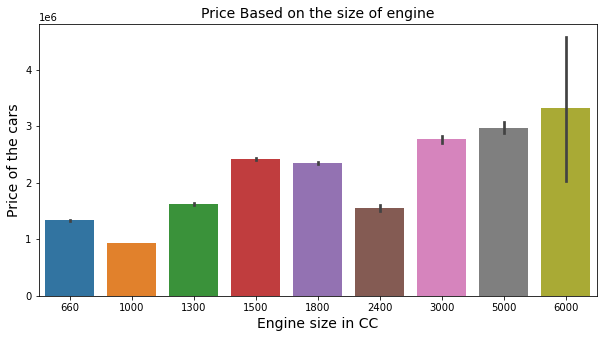

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Engine Size',y='Price')
plt.title("Price Based on the size of engine", size=14)
plt.xlabel('Engine size in CC',size=14)
plt.ylabel('Price of the cars',size=14)
plt.xticks(rotation=0)
plt.show()

- ***Prices are usually increasing with increasing engine size.***

### **Q5. Does the body type has any effect on the price of used cars?**

In [31]:
df['Body Type'].value_counts()

Hatchback        27674
Sedan            18578
Mini Van          1195
SUV               1176
Crossover          974
Van                683
Micro Van          628
MPV                511
Station Wagon      386
Pick Up            266
Double Cabin       256
High Roof           82
Single Cabin        55
Coupe               46
Convertible         27
Mini Vehicles       10
Truck                8
Name: Body Type, dtype: int64

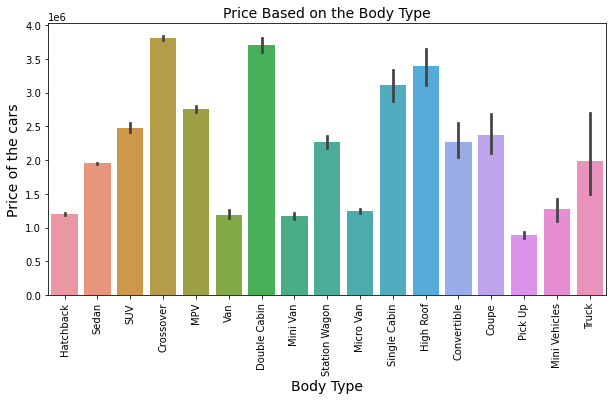

In [32]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Body Type',y='Price')
plt.title("Price Based on the Body Type", size=14)
plt.xlabel('Body Type',size=14)
plt.ylabel('Price of the cars',size=14)
plt.xticks(rotation=90)
plt.show()

In [33]:

df_group=df[['Transmission','Body Type', 'Price']]
grouped_df=df_group.groupby(['Transmission','Body Type']).mean().sort_values(by='Price', ascending=False)
grouped_df


Price
Transmission Body Type                  
Automatic    Double Cabin   3.981321e+06
             Crossover      3.812894e+06
             Single Cabin   3.777778e+06
             High Roof      3.595917e+06
Manual       Double Cabin   2.874952e+06
Automatic    MPV            2.871842e+06
Manual       Single Cabin   2.787027e+06
Automatic    SUV            2.774862e+06
             Coupe          2.620469e+06
             Sedan          2.432343e+06
Manual       Station Wagon  2.381818e+06
Automatic    Convertible    2.358864e+06
             Van            2.305562e+06
             Station Wagon  2.266981e+06
Manual       MPV            2.172050e+06
             Truck          1.986875e+06
             High Roof      1.882000e+06
             Convertible    1.845000e+06
             Coupe          1.820357e+06
Automatic    Hatchback      1.727595e+06
             Mini Van       1.663126e+06
Manual       SUV            1.485884e+06
             Sedan          1.474568e+06
Automatic    Micro Van      1.331852e+06
Manual       Crossover      1.297500e+06
Automatic    Mini Vehicles  1.281000e+06
Manual       Van            9.313219e+05
             Pick Up        8.889774e+05
             Micro Van      8.540431e+05
             Hatchback      8.421180e+05
             Mini Van       7.603354e+05
Automatic    Pick Up        7.500000e+05

<div class="alert alert-block alert-info">
<b>Inference:</b> From the above graph and grouped datafarme,it can be infered that automatic SUVs and Sedans have more price than their manual counterparts. Also, the most expensive cars are automatic crossovers and double cabins. </div>

### **Q6. Does the Model Year and Mileage have any effect on the price of used cars?**

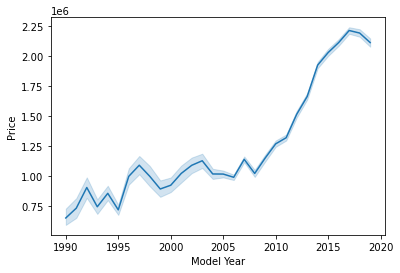

In [34]:
sns.lineplot(x='Model Year', y='Price', data=df)
plt.show()

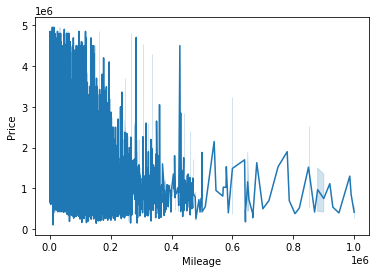

In [35]:
sns.lineplot(x='Mileage', y='Price', data=df)
plt.show()

<div class="alert alert-block alert-info">
<b>Inference:</b> From the above graphs,it can be infered that there is positive correlation of price with Model Year i.e the prices tends to increase for newer models.Whereas, prices tends to go down with more mileage. </div>

### **Q7. Does the Black color have any effect on the price of used cars?**

- ***It is a general public opinion that black colored cars are aesthetically pleasing. Let's see if it actually has any effect on the price.***

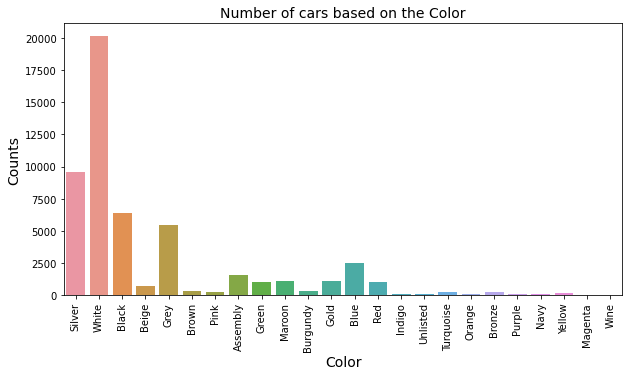

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(data=df,x='Color')
plt.title("Number of cars based on the Color", size=14)
plt.xlabel('Color',size=14)
plt.ylabel('Counts',size=14)
plt.xticks(rotation=90)
plt.show()

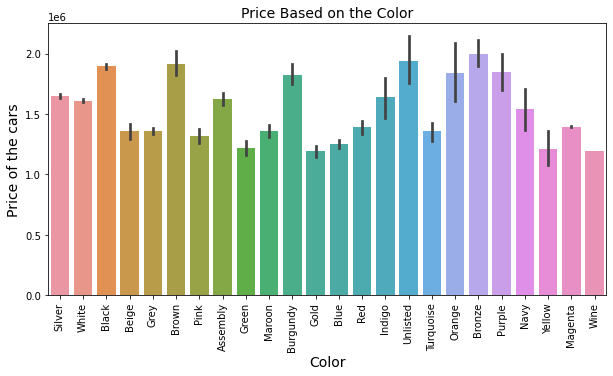

In [37]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Color',y='Price')
plt.title("Price Based on the Color", size=14)
plt.xlabel('Color',size=14)
plt.ylabel('Price of the cars',size=14)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b> From the first plot, it is visible that the cars listed in white and silver outnumber black colored cars in a large amount. However, from the second plot, black and brown colored cars have overall higher price than white, silver and gray.  </div>

### **Q8. Hybrids should be expensive because they give more mileage per litre, is it so?**

**-With the increasing petrol prices, people are moving towards hybrids which are fuel efficients.**   
**-The EV trend is very new and there are not much options in Pakistan, therefore hybrids are the closest options available in Pakistani markets, currently.**

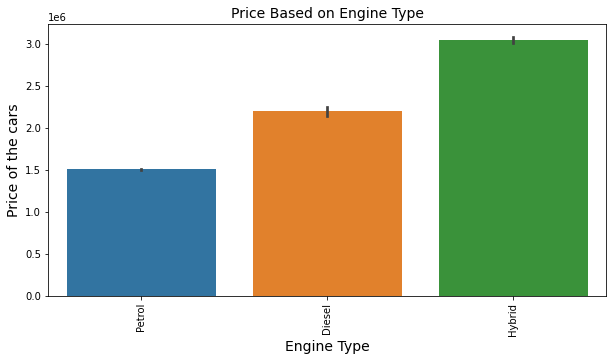

In [38]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Engine Type',y='Price')
plt.title("Price Based on Engine Type", size=14)
plt.xlabel('Engine Type',size=14)
plt.ylabel('Price of the cars',size=14)
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-info">
<b>Inference:</b> From the above graphs,it can be infered that hybrids are much more expensive than petrol based cars. Although, number of cars listed in petrol are much more than hybrids.   </div>

### **Q9. What maximum price I can set for my Honda Civic 1.8 i-VTEC CVT 2016, automatic, black color car?**

In [39]:
grp = df.groupby(['Name', 'Transmission', 'Model Year', 'Color'])
grp.get_group(('Honda Civic 1.8 i-VTEC CVT 2016', 'Automatic', 2016, 'Black'))

,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,z_score,Engine Size
Ad No,,,,,,,,,,,,,,,
4132731,Honda Civic 1.8 i-VTEC CVT 2016,2900000.0,2016,"DHA Defence, Karachi Sindh",55000,Karachi,Petrol,1800.0,Automatic,Black,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",1.126993,1800
4035132,Honda Civic 1.8 i-VTEC CVT 2016,2975000.0,2016,"Shalimar Town, Lahore Punjab",44000,Lahore,Petrol,1800.0,Automatic,Black,Local,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",1.195125,1800


<div class="alert alert-block alert-info">
    <b> So maximum price I can set for my car is 3 Million PKR. </div>

### **Q10. What other cars can I buy in this price range, and can i afford a hybrid one?** 

In [40]:
df_afford = df.loc[(df['Price'] < 3100000) & (df['Price']>2500000) & (df['Engine Type']=='Hybrid')]
df_afford

,Name,Price,Model Year,Location,Mileage,Registered City,Engine Type,Engine Capacity,Transmission,Color,Assembly,Body Type,Features,z_score,Engine Size
Ad No,,,,,,,,,,,,,,,
3763510,Toyota Aqua S 2016,3025000.0,2016,"Khalid Bin Walid Road, Karachi Sindh",75000,Un-Registered,Hybrid,1500.0,Automatic,White,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",1.240547,1500
4167974,Toyota Aqua S 2016,2875000.0,2016,Hyderabad Sindh,81000,Un-Registered,Hybrid,1500.0,Automatic,White,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",1.104282,1500
4142924,Honda Freed 2015,3000000.0,2015,"Jail Road, Lahore Punjab",38000,Lahore,Hybrid,1500.0,Automatic,Blue,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",1.217836,1500
4010809,Toyota Aqua S 2016,2850000.0,2016,"E-11, Islamabad Islamabad",29191,Un-Registered,Hybrid,1500.0,Automatic,Silver,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",1.081572,1500
3814572,Honda Grace Hybrid EX 2014,3000000.0,2014,"Jail Road, Lahore Punjab",65000,Lahore,Hybrid,1500.0,Automatic,White,Imported,Sedan,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",1.217836,1500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4128446,Toyota Prius Alpha S 2011,2650000.0,2011,Lahore Punjab,93000,Un-Registered,Hybrid,1800.0,Automatic,White,Imported,MPV,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",0.899885,1800
4128455,Toyota Aqua S 2016,2850000.0,2016,Lahore Punjab,100000,Un-Registered,Hybrid,1500.0,Automatic,White,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",1.081572,1500
4109889,Toyota Aqua S 2015,2545000.0,2015,"Bahria Town, Islamabad Islamabad",88000,Un-Registered,Hybrid,1500.0,Automatic,Blue,Imported,Hatchback,"ABS, AM/FM Radio, Air Bags, Air Conditioning,...",0.804500,1500


In [41]:
grp = df_afford.groupby(['Price', 'Model Year', 'Name']).mean().sort_values(by='Price', ascending=False)
grp.head(15)

Mileage  \
Price     Model Year Name                                                           
3090000.0 2017       Nissan Note 2017                                     30000.0   
          2013       Toyota Prius G Touring Selection Leather Packag...  190000.0   
3085000.0 2015       Honda Grace Hybrid EX 2015                           68000.0   
          2013       Honda Vezel Hybrid Z 2013                            70000.0   
3065000.0 2017       Toyota Aqua S 2017                                   20000.0   
3050000.0 2016       Honda Fit 1.5 Hybrid S Package 2016                  19000.0   
          2014       Toyota Corolla Axio Hybrid 1.5 2014                 121798.0   
          2015       Honda Fit 1.5 Hybrid Base Grade  2015                72000.0   
                     Honda Fit 1.5 Hybrid S Package 2015                  75000.0   
                     Honda Fit RS 2015                                   112869.0   
                     Honda Freed Hybrid 2015                              15000.0   
                     Honda Grace Hybrid LX 2015                           80000.0   
                     Toyota Aqua G 2015                                   80000.0   
          2014       Toyota Corolla Axio 2014                             98000.0   
          2016       Honda Fit Shuttle Hybrid 2016                        58873.0   

                                                                         Engine Capacity  \
Price     Model Year Name                                                                  
3090000.0 2017       Nissan Note 2017                                             1200.0   
          2013       Toyota Prius G Touring Selection Leather Packag...           1800.0   
3085000.0 2015       Honda Grace Hybrid EX 2015                                   1500.0   
          2013       Honda Vezel Hybrid Z 2013                                    1500.0   
3065000.0 2017       Toyota Aqua S 2017                                           1500.0   
3050000.0 2016       Honda Fit 1.5 Hybrid S Package 2016                          1500.0   
          2014       Toyota Corolla Axio Hybrid 1.5 2014                          1500.0   
          2015       Honda Fit 1.5 Hybrid Base Grade  2015                        1500.0   
                     Honda Fit 1.5 Hybrid S Package 2015                          1500.0   
                     Honda Fit RS 2015                                            1500.0   
                     Honda Freed Hybrid 2015                                      1500.0   
                     Honda Grace Hybrid LX 2015                                   1500.0   
                     Toyota Aqua G 2015                                           1500.0   
          2014       Toyota Corolla Axio 2014                                     1500.0   
          2016       Honda Fit Shuttle Hybrid 2016                                1500.0   

                                                                          z_score  
Price     Model Year Name                                                          
3090000.0 2017       Nissan Note 2017                                    1.299595  
          2013       Toyota Prius G Touring Selection Leather Packag...  1.299595  
3085000.0 2015       Honda Grace Hybrid EX 2015                          1.295053  
          2013       Honda Vezel Hybrid Z 2013                           1.295053  
3065000.0 2017       Toyota Aqua S 2017                                  1.276884  
3050000.0 2016       Honda Fit 1.5 Hybrid S Package 2016                 1.263258  
          2014       Toyota Corolla Axio Hybrid 1.5 2014                 1.263258  
          2015       Honda Fit 1.5 Hybrid Base Grade  2015               1.263258  
                     Honda Fit 1.5 Hybrid S Package 2015                 1.263258  
                     Honda Fit RS 2015                                   1.263258  
                     Honda Freed Hybrid 2015           

<div class="alert alert-block alert-info">
    <b> So I can buy 70000 KM driven Honda Vezel 2013 model, or a less 20000 KM driven Toyota Aqua 2017 model, or  a 2013 Toyota Prius. Though, we should keep in mind that Vezel is a crossover, Aqua: a hatchback, and Prius: a sedan.  </div>

---
---

## 4.Model Development and Evaluation.

In [42]:
x=df.drop(columns=['Price','Engine Capacity', 'Name', 'Location','Registered City',
                   'Assembly', 'Features', 'z_score' ]) #splitting to feautures and label
y=df[['Price']] 

In [43]:
x

,Model Year,Mileage,Engine Type,Transmission,Color,Body Type,Engine Size
Ad No,,,,,,,
4096758,2017,9869,Petrol,Automatic,Silver,Hatchback,1000
4168305,2019,11111,Petrol,Automatic,White,Sedan,1300
4168298,2019,17500,Petrol,Automatic,White,Hatchback,660
4168307,2019,9600,Petrol,Manual,White,Hatchback,660
4168306,2010,120000,Petrol,Manual,Black,Sedan,1300
...,...,...,...,...,...,...,...
3339018,2012,42000,Petrol,Automatic,Silver,Hatchback,660
3349017,2015,125000,Petrol,Automatic,Black,Sedan,1800
3722322,2015,35000,Hybrid,Automatic,White,Hatchback,1800


In [44]:
y

,Price
Ad No,
4096758,2385000.0
4168305,111000.0
4168298,1530000.0
4168307,1650000.0
4168306,1435000.0
...,...
3339018,1900000.0
3349017,3250000.0
3722322,4000000.0


In [45]:
x=pd.get_dummies(x)
x.shape

(52555, 57)

In [62]:
x

,Model Year,Mileage,Engine Type_Diesel,Engine Type_Hybrid,Engine Type_Petrol,Transmission_Automatic,Transmission_Manual,Color_Assembly,Color_Beige,Color_Black,...,Body Type_Van,Engine Size_660,Engine Size_1000,Engine Size_1300,Engine Size_1500,Engine Size_1800,Engine Size_2400,Engine Size_3000,Engine Size_5000,Engine Size_6000
Ad No,,,,,,,,,,,,,,,,,,,,,
4096758,2017,9869,0,0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4168305,2019,11111,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4168298,2019,17500,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4168307,2019,9600,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4168306,2010,120000,0,0,1,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3339018,2012,42000,0,0,1,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3349017,2015,125000,0,0,1,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3722322,2015,35000,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [79]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25) #splitting the data into train and test

In [80]:
lm=LinearRegression()
lm.fit(x_train,y_train)
lm.score(x_train,y_train),lm.score(x_test,y_test)

(0.8202948886139256, 0.8179667984344485)

In [81]:
poly = PolynomialFeatures(degree=2)
poly.fit(x_train, x_test)
X_poly = poly.transform(x_train)
Xtest_poly = poly.transform(x_test)
lm.fit(X_poly, y_train)
print(lm.score(X_poly,y_train))
print(lm.score(Xtest_poly, y_test))

0.8892398133321714
0.8606334665764099


***Let's see Ridge Regression Model.***

In [88]:
RigeModel=Ridge(alpha=0.1)

In [89]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [90]:
yhat = RigeModel.predict(x_test)

In [91]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [[ -37520.37618156]
 [ 455800.75011031]
 [ 427082.00917567]
 [1133508.03723985]]
test set : [[ 425000.]
 [ 315000.]
 [ 560000.]
 [1015000.]]


In [92]:
test_score, train_score = RigeModel.score(x_test, y_test), RigeModel.score(x_train, y_train)

In [93]:
test_score, train_score 

(0.8179452543395418, 0.8202944440329775)

<div class="alert alert-block alert-info">
    <b>  Polynomial Linear regression model is better than simple multiple linear regression, and Ridge Regression model because of R-Squared value we got at the end of each model.</div>

---
---

## 5.Model deployment and feedback.

- Depending on the organization, the model can be deployed. Depending on the purpose of the model, it may be rolled out to a limited group of users or in a test environment, to build up confidence in applying the outcome for use across the board.
- Throughout the Data Science Methodology, each step sets the stage for the next. Making the methodology cyclical ensures refinement at each stage in the game. 